In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, median_abs_deviation

# statistical annotation
def p_annotation(p, x1, x2, y, h=0.005, color='k',linewidth=3, font=47):
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=linewidth, c=color)
    plt.text((x1+x2)*.5, y+h, f'P = {p:.2f}', ha='center', va='bottom', color=color, fontsize=font)
    
def p__annotation(p, x1, x2, y, h=0.005, color='k',linewidth=3, font=47):
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=linewidth, c=color)
    plt.text((x1+x2)*.5, y+h, f'P = {p:.5f}', ha='center', va='bottom', color=color, fontsize=font)

### Read the data

In [ ]:
# Read the csv files for each experiment
csv_dppc5 = pd.read_csv('Data/20220111_RA_DPPC5.csv').astype(np.int64)
csv_sopc5 = pd.read_csv('Data/20220111_RA_SOPC5.csv').astype(np.int64)

csv_dppc3 = pd.read_csv('Data/20220722_RA_DPPC3.csv').astype(np.int64)
csv_sopc3 = pd.read_csv('Data/20220513_RA_SOPC3.csv').astype(np.int64)

csv_sopc2 = pd.read_csv('Data/20220125_RA_SOPC2.csv').astype(np.int64)

### Transform the csv files into data frames of Phase Contrast, RICM and Reduced Area.

In [ ]:
# Make the dataframes from the csv giving the odd values to the phase contrast and the even values to the RICM (Don't forget to add the scale when you need it)
df_dppc5 = pd.DataFrame({'PhC':csv_dppc5.iloc[::2].Area.values, 'RICM':csv_dppc5.iloc[1::2].Area.values})
df_sopc5 = pd.DataFrame({'PhC':csv_sopc5.iloc[::2].Area.values, 'RICM':csv_sopc5.iloc[1::2].Area.values})

df_dppc3 = pd.DataFrame({'PhC':csv_dppc3.iloc[::2].Area.values*0.125**2, 'RICM':csv_dppc3.iloc[1::2].Area.values*0.125**2}).astype(np.int64)
df_sopc3 = pd.DataFrame({'PhC':csv_sopc3.iloc[::2].Area.values*0.125**2, 'RICM':csv_sopc3.iloc[1::2].Area.values*0.125**2}).astype(np.int64)

df_sopc2 = pd.DataFrame({'PhC':csv_sopc2.iloc[::2].Area.values, 'RICM':csv_sopc2.iloc[1::2].Area.values})



# # Calculate the average of the reduced area for every GUV on both SOPC and DPPC
# df_dppc5['RA'] = (df_dppc5.PhC - df_dppc5.RICM) / df_dppc5.PhC
# df_sopc5['RA'] = (df_sopc5.PhC - df_sopc5.RICM) / df_sopc5.PhC

# df_dppc3['RA'] = (df_dppc3.PhC - df_dppc3.RICM) / df_dppc3.PhC
# df_sopc3['RA'] = (df_sopc3.PhC - df_sopc3.RICM) / df_sopc3.PhC

# df_sopc2['RA'] = (df_sopc2.PhC - df_sopc2.RICM) / df_sopc2.PhC


# Calculate the average of the reduced area for every GUV on both SOPC and DPPC
df_dppc5['RA'] = df_dppc5.RICM / df_dppc5.PhC
df_sopc5['RA'] = df_sopc5.RICM / df_sopc5.PhC

df_dppc3['RA'] = df_dppc3.RICM / df_dppc3.PhC
df_sopc3['RA'] = df_sopc3.RICM / df_sopc3.PhC

df_sopc2['RA'] = df_sopc2.RICM / df_sopc2.PhC

### Calculate the difference of reduced area between SOPC and DPPC in 5% concentration

In [ ]:
# Calculate the average of the reduced area on both SOPC and DPPC
RA_sopc5 = np.mean(df_sopc5.RA)
RA_dppc5 = np.mean(df_dppc5.RA)

print(f'The Reduced area for SOPC = {RA_sopc5:.2f}')
print(f'The Reduced area for DPPC = {RA_dppc5:.2f}')
print(f'The difference is {(RA_dppc5 - RA_sopc5)/RA_dppc5 :.2f} %')

The Reduced area for SOPC = 0.85
The Reduced area for DPPC = 0.73
The difference is -0.17 %


### Calculate the difference of reduced area between SOPC and DPPC in 3% concentration

In [ ]:
# Calculate the average of the reduced area on both SOPC and DPPC
RA_sopc3 = np.mean(df_sopc3.RA)
RA_dppc3 = np.mean(df_dppc3.RA)

print(f'The Reduced area for SOPC = {RA_sopc3:.2f}')
print(f'The Reduced area for DPPC = {RA_dppc3:.2f}')
print(f'The difference is {(RA_dppc3 - RA_sopc3)/RA_dppc3 :.2f} %')

The Reduced area for SOPC = 0.50
The Reduced area for DPPC = 0.29
The difference is -0.69 %


### Calculate the difference of reduced area between 3% and 5% concentration on both SOPC and DPPC

In [ ]:
print(f'The difference for SOPC is {(RA_sopc3 - RA_sopc5)/RA_sopc3 :.2f} %')
print(f'The difference for DPPC is {(RA_dppc3 - RA_dppc5)/RA_dppc3 :.2f} %')

The difference for SOPC is -0.70 %
The difference for DPPC is -1.47 %


In [ ]:
# Calculate the average of the reduced area on the SOPC
RA_sopc2 = np.mean(df_sopc2.RA)

print(f'The Reduced area for SOPC = {RA_sopc2:.2f}')

The Reduced area for SOPC = 0.41


### Calculate the Mann-Whitney U test P-value for the difference between DPPC and SOPC in reduced area for both 5% and 3% concentration

In [ ]:
# Calculate the Mann-Whitney U test P-value
_, p5 = mannwhitneyu(df_dppc5.RA.values, df_sopc5.RA.values)
_, p3 = mannwhitneyu(df_dppc3.RA.values, df_sopc3.RA.values)

_, p_sopc = mannwhitneyu(df_sopc5.RA.values, df_sopc3.RA.values)
_, p_dppc = mannwhitneyu(df_dppc5.RA.values, df_dppc3.RA.values)

print(f'The Mann-Whitney U test P-value')
print(f'SOPC 5% vs DPPC 5% = {p5:.5f}')
print(f'SOPC 3% vs DPPC 3% = {p3:.5f}')
print(f'SOPC 5% vs SOPC 3% = {p_sopc:.5f}')
print(f'DPPC 5% vs DPPC 3% = {p_dppc:.5f}')

The Mann-Whitney U test P-value
SOPC 5% vs DPPC 5% = 0.44019
SOPC 3% vs DPPC 3% = 0.02239
SOPC 5% vs SOPC 3% = 0.00654
DPPC 5% vs DPPC 3% = 0.00008


### Plot box plots

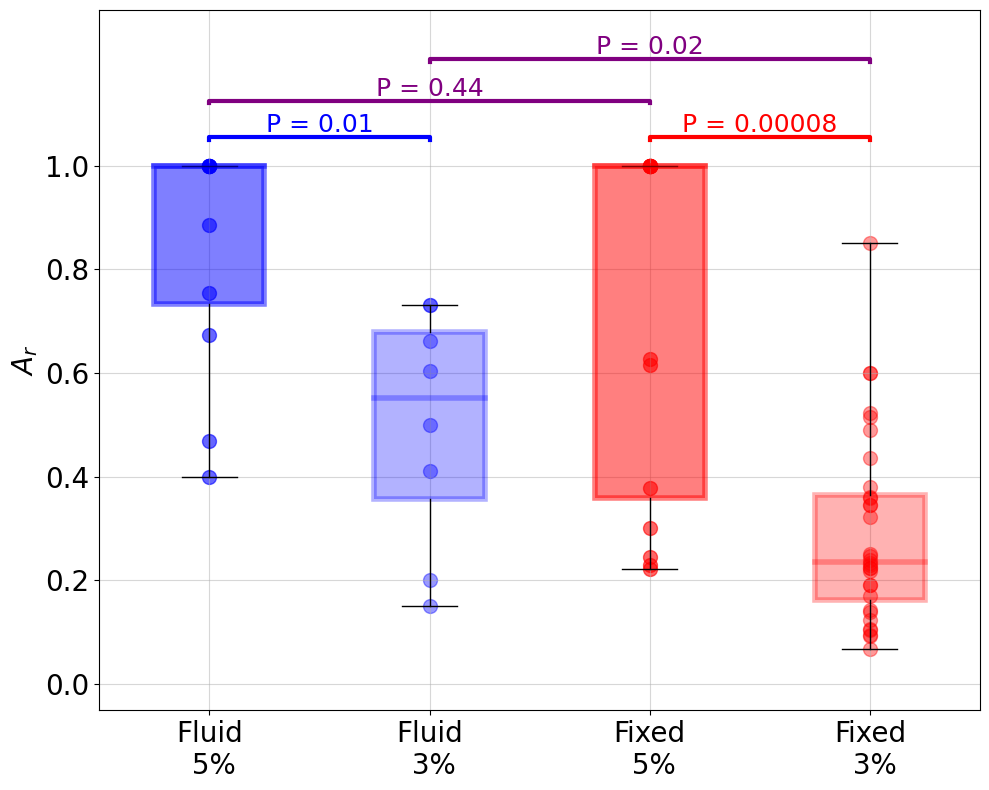

In [19]:
# statistical annotation
def p_annotation(p, x1, x2, y, h=0.005, color='k',linewidth=3, font=18):
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=linewidth, c=color)
    plt.text((x1+x2)*.5, y+h, f'P = {p:.2f}', ha='center', va='bottom', color=color, fontsize=font)
    
def p__annotation(p, x1, x2, y, h=0.005, color='k',linewidth=3, font=18):
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=linewidth, c=color)
    plt.text((x1+x2)*.5, y+h, f'P = {p:.5f}', ha='center', va='bottom', color=color, fontsize=font)

# Extract the reduced area from the data frames
ra_sopc5 = df_sopc5.RA.values
ra_sopc3 = df_sopc3.RA.values
ra_dppc5 = df_dppc5.RA.values
ra_dppc3 = df_dppc3.RA.values


plt.figure(figsize=(10,8))     # 16.54,20

# Define the boxes
bp = plt.boxplot([ra_sopc5, ra_sopc3, ra_dppc5, ra_dppc3],
                labels = ['Fluid\n 5%', 'Fluid\n 3%', 'Fixed\n 5%', 'Fixed\n 3%'],
                whis = 3.5,
                widths = 0.5,
                patch_artist=True);

# Customize the boxes
bp['boxes'][0].set(color='blue', linewidth=4, alpha=0.5)
bp['boxes'][1].set(color='blue', linewidth=4, alpha=0.3)
bp['boxes'][2].set(color='red' , linewidth=4, alpha=0.5)
bp['boxes'][3].set(color='red' , linewidth=4, alpha=0.3)

# Customize the Median line
bp['medians'][0].set(color='blue', linewidth=4, alpha=0.5)
bp['medians'][1].set(color='blue', linewidth=4, alpha=0.3)
bp['medians'][2].set(color='red' , linewidth=4, alpha=0.5)
bp['medians'][3].set(color='red' , linewidth=4, alpha=0.3)


# Plot the scattered points
plt.scatter(x = [1] * len(ra_sopc5), y = ra_sopc5, color='blue', s=100, alpha=0.6, label='Human cadherin on fluid 5%')
plt.scatter(x = [2] * len(ra_sopc3), y = ra_sopc3, color='blue', s=100, alpha=0.4, label='Human cadherin on fluid 3%')
plt.scatter(x = [3] * len(ra_dppc5), y = ra_dppc5, color='red' , s=100, alpha=0.6, label='Human cadherin on fixed 5%')
plt.scatter(x = [4] * len(ra_dppc3), y = ra_dppc3, color='red' , s=100, alpha=0.4, label='Human cadherin on fixed 3%')

# statistical annotation
p_annotation(p_sopc, 1, 2, df_sopc5.RA.max() + 0.05, color='blue')
p__annotation(p_dppc, 3, 4, df_dppc5.RA.max() + 0.05, color='red' )
p_annotation(p5    , 1, 3, df_dppc5.RA.max() + 0.12, color='purple')
p_annotation(p3    , 2, 4, df_dppc5.RA.max() + 0.2 , color='purple')

# Customize the table
plt.ylabel('$A_{r}$', fontsize=20)
plt.xticks(fontsize=20)
plt.ylim((-0.05 ,1.3))
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=20)
# plt.title('Reduced area with different cadherin concentration on fluid and fixed SLBs', fontsize=23)
plt.grid(alpha=0.5)
# plt.legend(fontsize='xx-large', loc='upper left')
plt.tight_layout()

# Save the figure
plt.savefig("boxplot_reduced_area_separated.png")
plt.show()

In [ ]:
reduced_area = pd.DataFrame({

### Print the data fram in latex formate

In [10]:
# print(df_dppc5.round(2).style.hide(axis="index").to_latex(hrules=True))

print(df_dppc5.round(2).to_latex(index=False))
print(df_sopc5.round(2).to_latex(index=False))
print(df_dppc3.round(2).to_latex(index=False))
print(df_sopc3.round(2).to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 PhC &  RICM &   RA \\
\midrule
 164 &    62 & 0.62 \\
  52 &    52 & 0.00 \\
  40 &    40 & 0.00 \\
 212 &    52 & 0.75 \\
  52 &    32 & 0.38 \\
 223 &   223 & 0.00 \\
  57 &    57 & 0.00 \\
 350 &   105 & 0.70 \\
  48 &    11 & 0.77 \\
  94 &    94 & 0.00 \\
  16 &    16 & 0.00 \\
  29 &    29 & 0.00 \\
  51 &    32 & 0.37 \\
  86 &    86 & 0.00 \\
  72 &    72 & 0.00 \\
 117 &    26 & 0.78 \\
\bottomrule
\end{tabular}

\begin{tabular}{rrr}
\toprule
 PhC &  RICM &   RA \\
\midrule
 776 &   522 & 0.33 \\
 205 &   205 & 0.00 \\
 237 &   237 & 0.00 \\
 544 &   482 & 0.11 \\
 350 &   350 & 0.00 \\
 345 &   138 & 0.60 \\
 363 &   363 & 0.00 \\
 145 &    68 & 0.53 \\
 215 &   162 & 0.25 \\
 356 &   356 & 0.00 \\
   7 &     7 & 0.00 \\
   5 &     5 & 0.00 \\
\bottomrule
\end{tabular}

\begin{tabular}{rrr}
\toprule
 PhC &  RICM &   RA \\
\midrule
 649 &    80 & 0.88 \\
 155 &    39 & 0.75 \\
 263 &   158 & 0.40 \\
 786 &    73 & 0.91 \\
 442 &    84 & 0.81 \\
 

/tmp/ipykernel_85867/1837534303.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_dppc5.round(2).to_latex(index=False))
/tmp/ipykernel_85867/1837534303.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_sopc5.round(2).to_latex(index=False))
/tmp/ipykernel_85867/1837534303.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature m